In [81]:
import numpy as np
from matplotlib import pyplot as plt
import os

directory = "../app/rpts_1024_256"
s_directory = "../app/rpts_512_128"
old_directory = "../../lab2/app/rpts"
#print(os.listdir(directory))
#print(os.listdir(os.path.abspath("../app/rpts")))

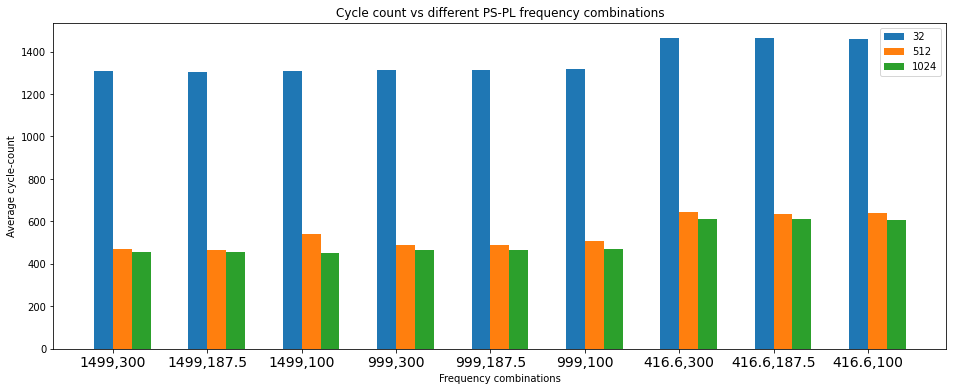

In [87]:
files = os.listdir(directory)

ps_freqs = [1499, 999, 416.6]
pl_freqs = [300, 187.5, 100]

means = np.array([[0,0,0], [0,0,0], [0,0,0]])
stds = np.array([[0,0,0], [0,0,0], [0,0,0]])

#smaller buswidth
s_means = np.array([[0,0,0], [0,0,0], [0,0,0]])
s_stds = np.array([[0,0,0], [0,0,0], [0,0,0]])

old_means = np.array([[0,0,0], [0,0,0], [0,0,0]])
old_stds = np.array([[0,0,0], [0,0,0], [0,0,0]])


for file in files:
    #file = files[0]

    from numpy import genfromtxt
        
    my_data = genfromtxt(directory + "/" + file, delimiter=',')
    my_old_data = genfromtxt(old_directory + "/" + file, delimiter=',')
    my_s_data = genfromtxt(s_directory + "/" + file, delimiter=',')
    
    if("cdma" in file):
        freqs = file.split('.')[0].split('_')[-2:]
        
        ps_freq = ps_freqs[int(freqs[0])]
        pl_freq = pl_freqs[int(freqs[1])]
        
        """
        print("PS freq = ", ps_freq, "PL freq = ", pl_freq)

        plt.title("PS freq = " + str(ps_freq) + "; PL freq = " + str(pl_freq))
        """ 
        
        x = [i[0] for i in my_data[1:]]

        #y = [i[1] if i[1] < 2000 else 1500 for i in my_data[1:]]
        y = [i[1] for i in my_data[1:]]
        
        old_y = [i[1] for i in my_old_data[1:]]
        s_y= [i[1] for i in my_s_data[1:]]
        
        mean = np.mean(y)
        std = np.std(y)
        
        means[int(freqs[0])][int(freqs[1])] = mean
        stds[int(freqs[0])][int(freqs[1])] = std
        
        old_means[int(freqs[0])][int(freqs[1])] = np.mean(old_y)
        old_stds[int(freqs[0])][int(freqs[1])] = np.std(old_y)
        
        s_means[int(freqs[0])][int(freqs[1])] = np.mean(s_y)
        s_stds[int(freqs[0])][int(freqs[1])] = np.std(s_y)
        
             
        
        """
        plt.plot(x, y, 'or')
        plt.savefig("cdma" + str(ps_freq) + str(pl_freq) + ".jpg")
        plt.show()
        """ 


ticks = []
for i in range(len(means)):
    for j in range(len(means[i])):
        ps_freq = ps_freqs[i]
        pl_freq = pl_freqs[j]
        #print("PS freq = ", ps_freq, "PL freq = ", pl_freq)
        #mean = means[i][j]
        #std = stds[i][j]
        #print("Mean = ", mean, "Std = ", std) 
        #ticks.append(str(i) + "_" + str(j))
        ticks.append(str(ps_freq) + "," + str(pl_freq))
        
means = means.flatten()
stds = stds.flatten()

old_means = old_means.flatten()
old_stds = old_stds.flatten()

s_means = s_means.flatten()
s_stds = s_stds.flatten()

N = len(means)
ind = np.arange(N) 
width = 0.2

plt.figure(figsize=(16,6))

plt.bar(ind, old_means, width, label='32')
plt.bar(ind + width, s_means, width, label='512')
plt.bar(ind + 2*width, means, width, label='1024')

plt.ylabel('Average cycle-count')
plt.title('Cycle count vs different PS-PL frequency combinations')

#plt.xticks(ind + width / 2, (ps_freqs[0], ps_freqs[1], ps_freqs[2]))
plt.xticks(ind + width / 2, ticks, fontsize=14)
plt.xlabel("Frequency combinations")
#plt.xticks(ticks)

plt.legend(loc='best')
plt.savefig("dma_cycle_count.jpg")
plt.show()


['minarray.csv', 'maxarray.csv']


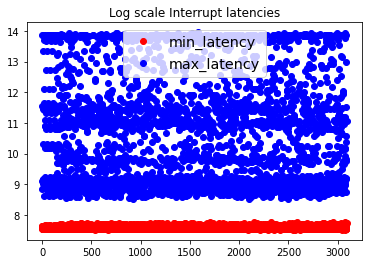

In [4]:
import os
directory = "../app/rpts"
files = [i for i in os.listdir(directory ) if 'array' in i ]

print(files)

max_array = []
min_array = []

fig, ax = plt.subplots()

for file in files:
    #file = files[0]

    from numpy import genfromtxt
        
    my_data = genfromtxt(directory + "/" + file, delimiter=',')
    my_data = [np.log(i) for i in my_data]
    #x = [i[0] for i in my_data[1:]]
    #y = [i[1] if i[1] < 2000 else 1500 for i in my_data[1:]]
    if "min" in file:
        #print(my_data)
        ax.plot(range(len(my_data)),my_data, 'or', label="min_latency")
    else:
        ax.plot(range(len(my_data)),my_data, 'ob', label="max_latency")

plt.title("Log scale Interrupt latencies")
legend = ax.legend(loc='upper center', shadow=False, fontsize='x-large')
plt.savefig("min_max_intr_latency.jpg")
plt.show()

